## Configurações de ambiente e importação de dados

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
dfs = pd.read_excel("jvvc_term_paper_intel.xlsx", sheet_name=None)

In [3]:
dfs.keys()

dict_keys(['papers', 'defenses', 'attacks', 'mnist_defenses', 'cifar10_defenses', 'imagenet_defenses', 'sheets_notes', 'general_notes', 'resources', 'schedule'])

In [4]:
sns.set_style("white")

## Analisando os papers obtidos

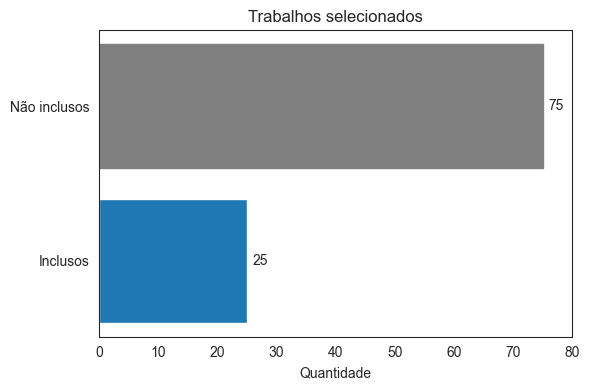

In [6]:
counts = (
    dfs["papers"]["included"]
    .map({True: "Inclusos", False: "Não inclusos"})
    .value_counts()
    .sort_values()
)

plt.figure(figsize=(6, 4))
bars = plt.barh(counts.index, counts.values)

bars[1].set_color("gray")

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        va="center",
    )

plt.xlabel("Quantidade")
plt.xlim(0, counts.max() + 5)
plt.ylabel("")
plt.title("Trabalhos selecionados")
plt.tight_layout()

plt.show()

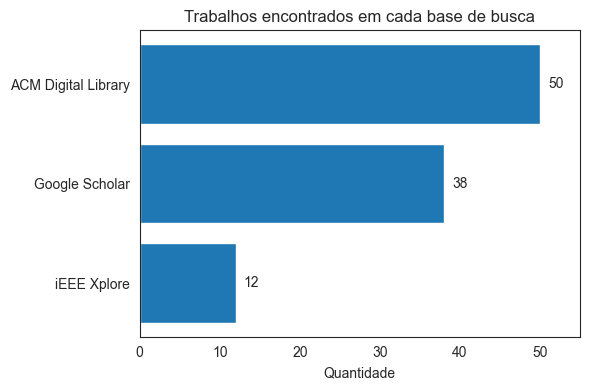

In [7]:
counts = (
    dfs["papers"]["engine"]
    .map(
        {
            "google_scholar": "Google Scholar",
            "acm_dl": "ACM Digital Library",
            "ieee_xplore": "iEEE Xplore",
        }
    )
    .value_counts()
    .sort_values()
)
counts

plt.figure(figsize=(6, 4))
bars = plt.barh(counts.index, counts.values)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        va="center",
    )

plt.xlabel("Quantidade")
plt.xlim(0, counts.max() + 5)
plt.ylabel("")
plt.title("Trabalhos encontrados em cada base de busca")
plt.tight_layout()

plt.show()

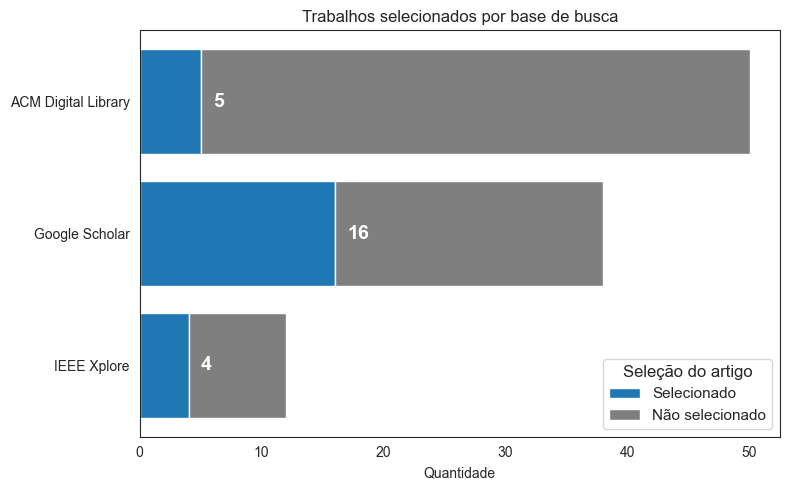

In [ ]:
stacked_data = (
    dfs["papers"]
    .assign(
        engine=dfs["papers"]["engine"].map(
            {
                "google_scholar": "Google Scholar",
                "acm_dl": "ACM Digital Library",
                "ieee_xplore": "IEEE Xplore",
            }
        )
    )
    .groupby(["engine", "included"])
    .size()
    .unstack(fill_value=0)
    .rename(columns={True: "Selecionado", False: "Não selecionado"})
)
stacked_data = (
    stacked_data.assign(
        total=stacked_data["Não selecionado"] + stacked_data["Selecionado"]
    )
    .sort_values(by="total", ascending=True)
    .drop(columns="total")
)

plt.figure(figsize=(8, 5))

colors = {"Selecionado": "tab:blue", "Não selecionado": "tab:gray"}

bottom = None
for label in ["Selecionado", "Não selecionado"]:
    values = stacked_data[label]
    bars = plt.barh(
        stacked_data.index, values, left=bottom, label=label, color=colors[label]
    )
    if bottom is None:
        bottom = values
    else:
        bottom = bottom + values

for i in range(len(stacked_data)):
    index = stacked_data.index[i]
    incluso_width = stacked_data.loc[index, "Selecionado"]

    plt.text(
        x=incluso_width + 1,
        y=i,
        s=stacked_data.loc[index]["Selecionado"],
        va="center",
        color="white",
        fontweight="bold",
        fontsize=14,
    )

plt.xlabel("Quantidade")
plt.title("Trabalhos selecionados por base de busca")
plt.legend(title="Seleção do artigo", fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
sel_df = dfs["papers"][dfs["papers"]["included"] == True]

In [23]:
def extract_year(citation: str) -> int:
    return str.split(citation, ", ")[1].replace(")", "")

In [25]:
sel_df["year"] = sel_df["citation"].apply(extract_year)
sel_df

C:\Users\Vitor\AppData\Local\Temp\ipykernel_6348\4147786366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["year"] = sel_df["citation"].apply(extract_year)


,doi,citation,reference,title,Aborda algoritmos de ataque adversarial contra redes neurais no contexto de visão computacional,Aborda mecanismos e práticas de defesa para aumentar a resiliência de uma rede neural a ataques adversariais,O estudo é revisado por pares,"Aborda visão computacional, mas não aborda ataques adversariais ou defesas contra esse tipo de ataque",O estudo é um artigo duplicado,included,related,engine,search_string,read,link,note,year
2,https://doi.org/10.1016/j.jai.2023.10.002,"(LIU et al., 2023)","​Liu, J.; Jin, Y. A comprehensive survey of ro...",A comprehensive survey of robust deep learning...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A comprehensive survey of robust deep learning...,NaN,2023
3,https://doi.org/10.1080/00031305.2021.2006781,"(LI et al., 2022)",NaN,A Review of Adversarial Attack and Defense for...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Review of Adversarial Attack and Defense for...,NaN,2022
5,https://doi.org/10.1007/s11042-023-15883-z,"(BAJAJ et al., 2024)","​Bajaj, A.; Vishwakarma, D. K. A state-of-the-...",A state-of-the-art review on adversarial machi...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A state-of-the-art review on adversarial machi...,NaN,2024
6,https://doi.org/10.48550/arXiv.1912.01667,"(BHAMBRI et al., 2020)","​Bhambri, S., Muku, S., Tulasi, A., & Buduru, ...",A Survey of Black-Box Adversarial Attacks on C...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Black-Box Adversarial Attacks on C...,NaN,2020
7,10.1109/ICCC59590.2023.10507598,"(WEI et al., 2023)",NaN,A Survey of Harnessing Self-Supervision Agains...,True,True,True,False,False,True,False,ieee_xplore,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Harnessing Self-Supervision Agains...,NaN,2023
8,https://doi.org/10.1145/3636551,"(LI et al., 2024)",NaN,A Survey of Robustness and Safety of 2D and 3D...,True,True,True,False,False,True,False,acm_dl,"(""survey"" OR ""systematic review"") AND (""advers...",True,A Survey of Robustness and Safety of 2D and 3D...,NaN,2024
9,https://doi.org/10.1016/j.cose.2022.102847,"(LONG et al., 2022)","LONG, Teng; GAO, Qi; XU, Lili; ZHOU, Zhangbing...",A survey on adversarial attacks in computer vi...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,A survey on adversarial attacks in computer vi...,NaN,2022
10,10.1109/ACCESS.2021.3127960,"(AKHTAR et al., 2021)","AKHTAR, N. et al. Advances in adversarial atta...",Advances in Adversarial Attacks and Defenses i...,True,True,True,False,False,True,True,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Advances in Adversarial Attacks and Defenses i...,NaN,2021
11,https://doi.org/10.3390/electronics11081283,"(LIANG et al., 2022)","​Liang, H., He, E., Zhao, Y., Jia, Z., & Li, H...",Adversarial Attack and Defense: A Survey,True,True,True,False,False,True,True,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Adversarial Attack and Defense: A Survey.pdf,NaN,2022
14,https://doi.org/10.1145/3691625,"(BADJIE et al., 2024)","​Badjie, B., Cecílio, J., & Casimiro, A. (2024...",Adversarial Attacks and Countermeasures on Ima...,True,True,True,False,False,True,False,google_scholar,"(""survey"" OR ""systematic review"") AND (""advers...",True,Adversarial Atacks and Countermeasures on Imag...,NaN,2024


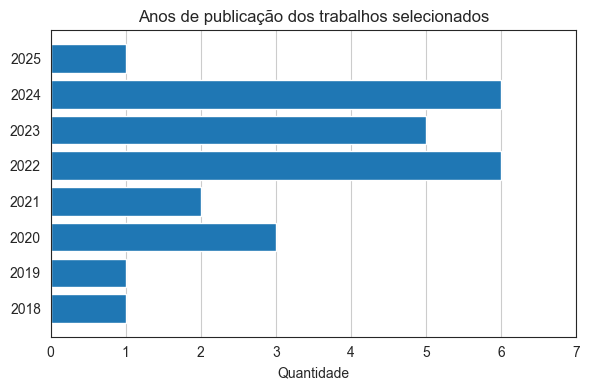

In [35]:
counts = sel_df["year"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
bars = plt.barh(counts.index, counts.values)

plt.xlabel("Quantidade")
plt.xlim(0, counts.max() + 1)
plt.ylabel("")
plt.grid(axis="x")
plt.title("Anos de publicação dos trabalhos selecionados")
plt.tight_layout()

plt.show()

In [ ]:
print(
    f"Porcentagem de trabalhos publicados desde 2024: {sum(sel_df['year'] >= '2024') / len(sel_df)} ({sum(sel_df['year'] >= '2024')} de {len(sel_df)})"
)

Porcentagem de trabalhos publicados desde 2024: 0.28 (7 de 25)


In [ ]:
print(
    f"Porcentagem de trabalhos publicados desde 2024: {sum(sel_df['year'] >= '2022') / len(sel_df)} ({sum(sel_df['year'] >= '2022')} de {len(sel_df)})"
)

Porcentagem de trabalhos publicados desde 2024: 0.72 (18 de 25)


## Analisando os ataques encontrados

In [ ]:
attacks = dfs["attacks"][dfs["attacks"]["notes"].notna()]

In [49]:
attacks

,attack,black,white,targeted,untargeted,norms,universal,specific,iterative,one_shot,categories,year,notes,mentions_attack,mention_count,sheet_source
0,FGSM,0,1,0,1,L_inf,0,1,0,1,gradient,2015,FGSM,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",24.0,"(LONG et al., 2022)"
1,PGD,0,1,1,0,L_inf,0,1,1,0,gradient,2017,PGD,"(LIU et al., 2023), (AKHTAR et al., 2021), (LI...",24.0,"(LONG et al., 2022)"
2,C&W,0,1,1,1,"L0,L2,L_inf",0,1,1,0,gradient,2017,C&W,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",21.0,"(LONG et al., 2022)"
3,DeepFool,0,1,0,1,"L2,L_inf",1,1,1,0,gradient,2015,DeepFool,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",20.0,"(LONG et al., 2022)"
4,BIM (I-FGSM),0,1,1,1,L_inf,0,1,1,0,gradient,2016,BIM,"(LIU et al., 2023), (AKHTAR et al., 2021), (BA...",19.0,"(LONG et al., 2022)"
5,JSMA,0,1,1,0,L0,0,1,1,0,gradient,2015,JSMA,"(BADJIE et al., 2024), (BHAMBRI et al., 2020),...",18.0,"(LONG et al., 2022)"
7,GAP++,0,1,1,0,"L0,L2,L_inf",1,0,0,1,transfer,2019,GAP++,"(LIU et al., 2023), (BADJIE et al., 2024), (AK...",17.0,"(LIANG et al., 2022)"
8,L-BFGS,0,1,1,0,L_inf,0,1,1,0,gradient,2014,L-BFGS,"(BADJIE et al., 2024), (COSTA et al., 2024), (...",16.0,"(LONG et al., 2022)"
12,UAP,0,1,0,1,"L2,L_inf",1,0,1,0,gradient,2017,UAP,"(LIU et al., 2023), (BADJIE et al., 2024), (DI...",14.0,"(LONG et al., 2022)"
13,ZOO,1,0,1,1,L2,0,1,1,0,"transfer,score",2017,ZOO,"(LIU et al., 2023), (BADJIE et al., 2024), (LI...",14.0,"(LONG et al., 2022)"
